In [1]:
!pip install jupyter_black
import jupyter_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data

In [2]:
df = pd.read_excel('Contact Center Data.xlsb', engine='pyxlsb')

In [3]:
df.head()

,Customer_Id,Source,Customer_Profile,Age_Group,Gender,Purpose,Product_Type,Comments,Outcome
0,1,SMS,Salaried,22 - 25,Male,Movies,Tablet,Call drop.,Call Disconnected
1,2,Websites,Salaried,22 - 25,Male,Speed Response,Notebook,Call drop,Call Disconnected
2,3,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,"While assisting with the info, Customer discon...",Call Disconnected
3,4,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,Customer had already ordered for G500 and enqu...,Product Specs Enquiry
4,5,Websites,Salaried,22 - 25,Male,Stylish,Tablet,Call disconnected,Call Disconnected


In [4]:
df.columns.tolist()

['Customer_Id',
 'Source',
 'Customer_Profile',
 'Age_Group',
 'Gender',
 'Purpose',
 'Product_Type',
 'Comments',
 'Outcome']

In [5]:
df.shape

(86410, 9)

# Customer_Id

In [6]:
df['Customer_Id'].nunique()

52602

- Same customer/s have called multiple times - len(df) > number of customers

In [7]:
df['Customer_Id'].value_counts().describe(np.arange(0,1,0.1))

count    52602.000000
mean         1.642713
std          1.988710
min          1.000000
0%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          2.000000
90%          3.000000
max         71.000000
Name: Customer_Id, dtype: float64

- We can see that there are only few customers those have called more than 1 time
- Majority of customers (70%) have called only 1 time

In [8]:
df['Customer_Id'].value_counts().describe(np.arange(0.9,1,0.01))

count    52602.000000
mean         1.642713
std          1.988710
min          1.000000
50%          1.000000
90%          3.000000
91%          3.000000
92%          3.000000
93%          4.000000
94%          4.000000
95%          4.000000
96%          5.000000
97%          6.000000
98%          7.000000
99%         10.000000
max         71.000000
Name: Customer_Id, dtype: float64

- 10% people have called more than 3 times

In [9]:
df['Customer_Id'].value_counts().head(10)

1107     71
18092    66
20847    57
14650    56
1023     49
25481    49
21286    43
35285    42
20850    40
18865    39
Name: Customer_Id, dtype: int64

- top 10 caller Customer_Ids

# Source

In [10]:
df['Source'].nunique()

7

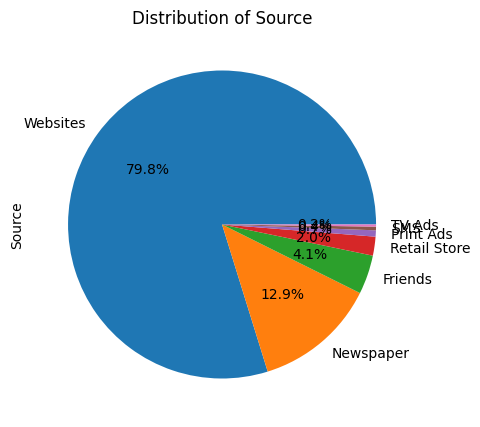

In [11]:
plt.figure(figsize=(5,5))
df['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Source')
plt.show()

In [12]:
df['Source'].unique().tolist()

['SMS',
 'Websites',
 'Newspaper',
 'Retail Store',
 'Friends',
 'Print Ads',
 'TV Ads']

- There are 7 unique sources of calling

In [13]:
df['Source'].value_counts()

Websites        68947
Newspaper       11120
Friends          3538
Retail Store     1713
Print Ads         570
SMS               333
TV Ads            189
Name: Source, dtype: int64

- Value counts of origin of call

In [14]:
(df['Source'].value_counts()*100/ df['Source'].value_counts().sum()).round(2)

Websites        79.79
Newspaper       12.87
Friends          4.09
Retail Store     1.98
Print Ads        0.66
SMS              0.39
TV Ads           0.22
Name: Source, dtype: float64

- "Websites" and "Newspaper" are among top two sources
    - ~ 80% of calls originate from "Websites"
    - ~ 13% of calls originate from "Newspaper"
- "SMS" and "TV Ads" are among the bottom two sources

# Customer_Profile

In [15]:
df['Customer_Profile'].nunique()

6

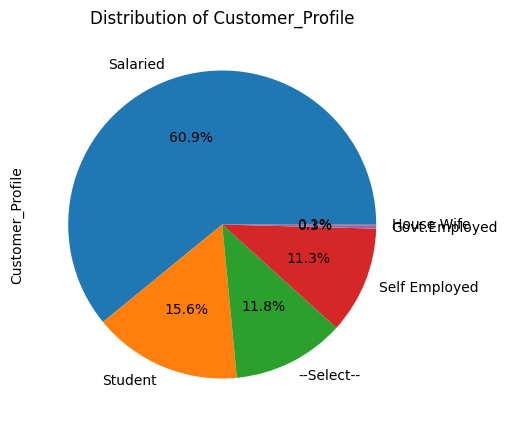

In [16]:
plt.figure(figsize=(5,5))
df['Customer_Profile'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Customer_Profile')
plt.show()

In [17]:
df['Customer_Profile'].unique().tolist()

['Salaried',
 'Student',
 '--Select--',
 'Self Employed',
 'Govt.Employed',
 'House Wife']

- There are 6 unique customer profiles

In [18]:
df['Customer_Profile'].value_counts()

Salaried         52631
Student          13488
--Select--       10181
Self Employed     9740
Govt.Employed      274
House Wife          96
Name: Customer_Profile, dtype: int64

- Value counts of various customer profiles

In [19]:
(df['Customer_Profile'].value_counts()*100/ df['Customer_Profile'].value_counts().sum()).round(2)

Salaried         60.91
Student          15.61
--Select--       11.78
Self Employed    11.27
Govt.Employed     0.32
House Wife        0.11
Name: Customer_Profile, dtype: float64

- "Salaried" person as a customer forms the largest segment of callers in the group
- "Student" as a customer is 2nd in the segment of callers with ~15% distribution
- "--Select--" being ~12% - we do not know customer profile value of 12% people
- "Self Employed" cover ~11% of the callers

# Age_Group

In [20]:
df['Age_Group'].nunique()

8

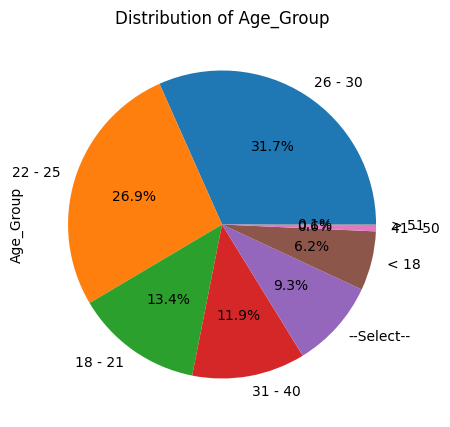

In [21]:
plt.figure(figsize=(5,5))
df['Age_Group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Age_Group')
plt.show()

In [22]:
df['Age_Group'].unique().tolist()

['22 - 25',
 '26 - 30',
 '18 - 21',
 '--Select--',
 '31 - 40',
 '< 18',
 '41 - 50',
 '> 51']

- There are 8 unique age groups

In [23]:
df['Age_Group'].value_counts()

26 - 30       27357
22 - 25       23208
18 - 21       11554
31 - 40       10274
--Select--     8028
< 18           5373
41 - 50         507
> 51            109
Name: Age_Group, dtype: int64

- Value counts of various age groups

In [24]:
(df['Age_Group'].value_counts()*100/ df['Age_Group'].value_counts().sum()).round(2)

26 - 30       31.66
22 - 25       26.86
18 - 21       13.37
31 - 40       11.89
--Select--     9.29
< 18           6.22
41 - 50        0.59
> 51           0.13
Name: Age_Group, dtype: float64

- "26 - 30" age group forms the largest segment of callers in the group being ~32%
- "22 - 25" as a customer is 2nd in the segment of callers with ~27% distribution
- "--Select--" being ~9% - we do not know age group value of 9% of the people

# Gender

In [25]:
df['Gender'].nunique()

3

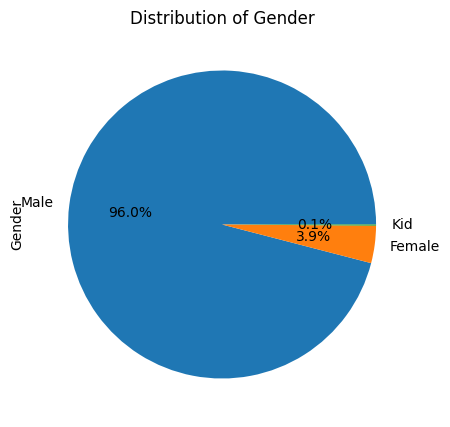

In [26]:
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

In [27]:
df['Gender'].unique().tolist()

['Male', 'Female', 'Kid']

- There are 3 unique Gender values in data

In [28]:
df['Gender'].value_counts()

Male      82922
Female     3380
Kid         108
Name: Gender, dtype: int64

- Value counts of various Genders

In [29]:
(df['Gender'].value_counts()*100/ df['Gender'].value_counts().sum()).round(2)

Male      95.96
Female     3.91
Kid        0.12
Name: Gender, dtype: float64

- Males occupy ~96% of the distribution in Gender values
- Female occupies ~3.9% of the distribution of Gender values
- This data point is highly skewed towards Males suggesting very high number of Male callers as compared to Female callers

# Purpose

In [30]:
df['Purpose'].nunique()

10

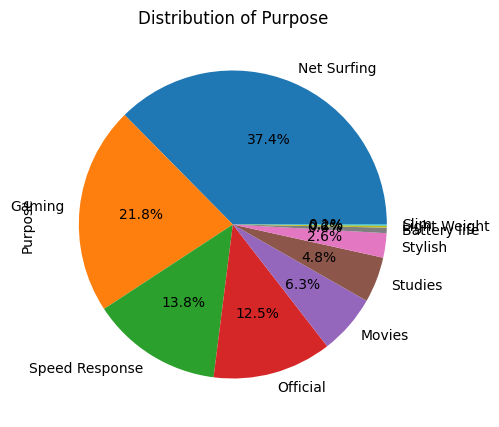

In [31]:
plt.figure(figsize=(5,5))
df['Purpose'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Purpose')
plt.show()

In [32]:
df['Purpose'].unique().tolist()

['Movies',
 'Speed Response',
 'Stylish',
 'Studies',
 'Net Surfing',
 'Battery life',
 'Official',
 'Gaming',
 'Light Weight',
 'Slim']

- There are 10 unique Purposes of a customer for calling

In [33]:
df['Purpose'].value_counts()

Net Surfing       32321
Gaming            18864
Speed Response    11897
Official          10794
Movies             5405
Studies            4139
Stylish            2211
Battery life        499
Light Weight        186
Slim                 94
Name: Purpose, dtype: int64

- Value counts of various Purposes

In [34]:
(df['Purpose'].value_counts()*100/ df['Purpose'].value_counts().sum()).round(2)

Net Surfing       37.40
Gaming            21.83
Speed Response    13.77
Official          12.49
Movies             6.26
Studies            4.79
Stylish            2.56
Battery life       0.58
Light Weight       0.22
Slim               0.11
Name: Purpose, dtype: float64

- ~37% of customers call for "Net Surfing" making it top Purpose for calling
- ~22% of customers call for "Gaming" making it 2nd most Purpose for calling

# Product_Type

In [35]:
df['Product_Type'].nunique()

7

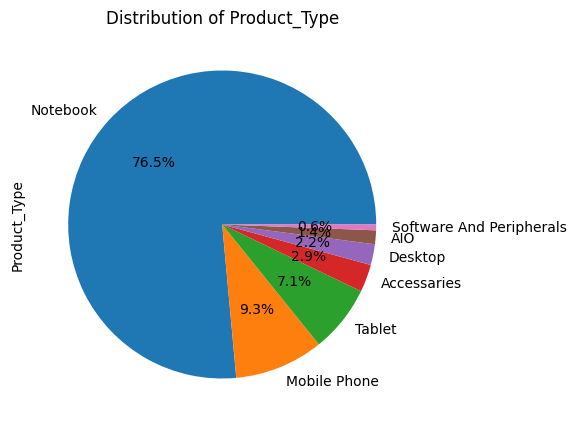

In [36]:
plt.figure(figsize=(5,5))
df['Product_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Product_Type')
plt.show()

In [37]:
df['Product_Type'].unique().tolist()

['Tablet',
 'Notebook',
 'Mobile Phone',
 'Desktop',
 'Accessaries',
 'AIO',
 'Software And Peripherals']

- There are 7 unique Product_Type values in data

In [38]:
df['Product_Type'].value_counts()

Notebook                    66068
Mobile Phone                 8074
Tablet                       6109
Accessaries                  2500
Desktop                      1887
AIO                          1249
Software And Peripherals      523
Name: Product_Type, dtype: int64

- Value counts of various product types

In [39]:
(df['Product_Type'].value_counts()*100/ df['Product_Type'].value_counts().sum()).round(2)

Notebook                    76.46
Mobile Phone                 9.34
Tablet                       7.07
Accessaries                  2.89
Desktop                      2.18
AIO                          1.45
Software And Peripherals     0.61
Name: Product_Type, dtype: float64

- Notebook forms ~76% of the distribution in Product_Type values : making it top product for which people are calling
- Mobile Phone forms ~9% of the distribution of Product_Type values : making it second most product for which people are calling


# Comments

In [40]:
df['Comments'].nunique()

41943

In [41]:
df['Comments'].unique().tolist()[:10]

['Call drop.',
 'Call drop',
 'While assisting with the info, Customer disconnected the call.',
 'Customer had already ordered for G500 and enquired about it.',
 'Call disconnected',
 'Customer called to know about sheild warrenty assisted accordingly',
 'Customer had a technical doubt.',
 'Assisted with product specs, Already lead passed.',
 'Customer enquired about the do gear offer registeration procedure.',
 'Customer had a technical problem.']

In [42]:
def preprocess_comments(txt):
    # keep only letters and digits
    t = txt.lower()
    t = re.sub('[^a-z0-9]+', ' ', t).strip()
    return t


In [43]:
df['clean_comments'] = df['Comments'].astype(str).apply(lambda x:preprocess_comments(x))
df['clean_comments'].value_counts().head(10)

call drop                                    2844
call disconnected                             915
drop call                                     913
assisted with offer details                   857
customer enquired about offer                 828
diwali offer enquiry                          783
offer enquiry                                 749
technical issue                               740
customer enquired about diwali offer          657
assisted with technical department number     519
Name: clean_comments, dtype: int64

- Top 10 comments

In [44]:
(df['clean_comments'].value_counts()*100/ df['clean_comments'].value_counts().sum()).round(2).head(10)

call drop                                    3.29
call disconnected                            1.06
drop call                                    1.06
assisted with offer details                  0.99
customer enquired about offer                0.96
diwali offer enquiry                         0.91
offer enquiry                                0.87
technical issue                              0.86
customer enquired about diwali offer         0.76
assisted with technical department number    0.60
Name: clean_comments, dtype: float64

In [45]:
!pip install WordCloud

- Top 10 comments percentage distribution
- We can see almost 5% of the times call is being dropped or disconnected
- We can see that people are calling for being assisted with various offers and other technical equiries

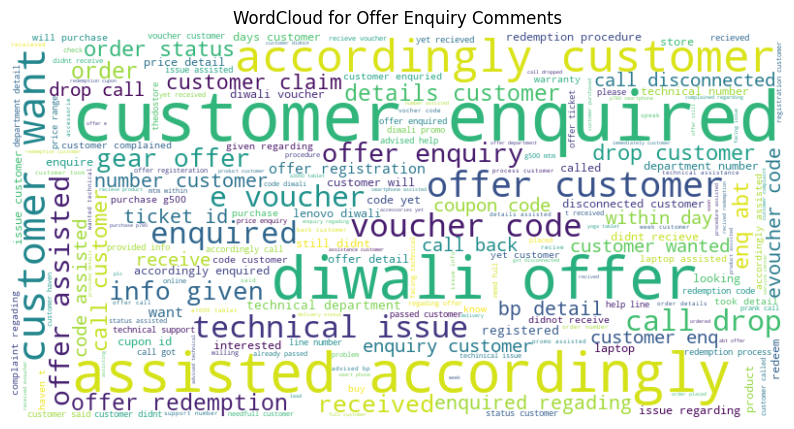

In [46]:
from wordcloud import WordCloud
comment = df['clean_comments'].astype(str)
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(comment))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Offer Enquiry Comments')
plt.show()

# Outcome

In [47]:
df['Outcome'].nunique()

20

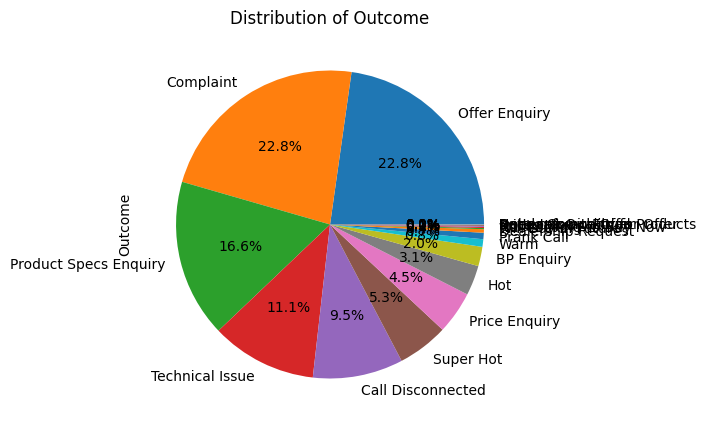

In [48]:
plt.figure(figsize=(5,5))
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Outcome')
plt.show()

In [49]:
df['Outcome'].unique().tolist()

['Call Disconnected',
 'Product Specs Enquiry',
 'Offer Enquiry',
 'Technical Issue',
 'Price Enquiry',
 'Complaint',
 'BP Enquiry',
 'Need Info an Email',
 'Super Hot',
 'Hot',
 'Warm',
 'Prank Call',
 'Dealership Request',
 'Prices High',
 'Not Looking to Buy Now',
 'Unhappy with Offer',
 'Will Buy in Future',
 'Cold',
 'Better Competition Products',
 'Does not Quality for Offer']

In [50]:
df['Outcome'].value_counts()

Offer Enquiry                  19674
Complaint                      19669
Product Specs Enquiry          14325
Technical Issue                 9595
Call Disconnected               8194
Super Hot                       4612
Price Enquiry                   3864
Hot                             2715
BP Enquiry                      1755
Warm                             686
Prank Call                       583
Dealership Request               316
Will Buy in Future               105
Not Looking to Buy Now           104
Cold                              95
Prices High                       74
Need Info an Email                17
Unhappy with Offer                11
Better Competition Products       10
Does not Quality for Offer         6
Name: Outcome, dtype: int64

In [51]:
(df['Outcome'].value_counts()*100/ df['Outcome'].value_counts().sum()).round(2).head(10)

Offer Enquiry            22.77
Complaint                22.76
Product Specs Enquiry    16.58
Technical Issue          11.10
Call Disconnected         9.48
Super Hot                 5.34
Price Enquiry             4.47
Hot                       3.14
BP Enquiry                2.03
Warm                      0.79
Name: Outcome, dtype: float64

- We can see that maximum people are either calling for enquiring about offer (23%) or raising a complaint (23%)
- Call is being disconnected ~9% of the times

# Summary of Univariate Analysis

TODO
"Websites" and "Newspaper" are among top two sources
~ 80% of calls originate from "Websites"
~ 13% of calls originate from "Newspaper"

"Salaried" person as a customer forms the largest segment of callers in the group
"Student" as a customer is 2nd in the segment of callers with ~15% distribution

"26 - 30" age group forms the largest segment of callers in the group being ~32%
"22 - 25" as a customer is 2nd in the segment of callers with ~27% distribution
"--Select--" being ~9% - we do not know age group value of 9% of the people

Males occupy ~96% of the distribution in Gender values
Female occupies ~3.9% of the distribution of Gender values
This data point is highly skewed towards Males suggesting very high number of Male callers as compared to Female callers

~37% of customers call for "Net Surfing" making it top Purpose for calling
~22% of customers call for "Gaming" making it 2nd most Purpose for calling

Notebook forms ~76% of the distribution in Product_Type values : making it top product for which people are calling
Mobile Phone forms ~9% of the distribution of Product_Type values : making it second most product for which people are calling

We can see almost 5% of the times call is being dropped or disconnected
We can see that people are calling for being assisted with various offers and other technical enquiries

```['Customer_Id',
 'Source',
 'Customer_Profile',
 'Age_Group',
 'Gender',
 'Purpose',
 'Product_Type',
 'Comments',
 'Outcome']```